#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
#設定一下GPU

import os
import tensorflow as tf
import keras
from tensorflow.compat.v1.keras.backend import set_session

def create_session(gpu_id='0', pp_mem_frac=None):

    tf.compat.v1.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.compat.v1.Session(config = config)
    return session
gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)
print("GPU Finished..............................")

GPU Finished..............................


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
#分類模型時常不太適合用MSE，不過作業要求還是先用用看
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [27]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                validation_split=0.2, 
                epochs=12, 
                batch_size=128, 
                verbose=1)

Epoch 1/12
313/313 [==============================] - 60s 191ms/step - loss: 0.0881 - accuracy: 0.1873 - val_loss: 0.0884 - val_accuracy: 0.2252
Epoch 2/12
313/313 [==============================] - 61s 196ms/step - loss: 0.0879 - accuracy: 0.1907 - val_loss: 0.0882 - val_accuracy: 0.2307
Epoch 3/12
313/313 [==============================] - 61s 194ms/step - loss: 0.0876 - accuracy: 0.1983 - val_loss: 0.0880 - val_accuracy: 0.2366
Epoch 4/12
313/313 [==============================] - 62s 199ms/step - loss: 0.0873 - accuracy: 0.2034 - val_loss: 0.0878 - val_accuracy: 0.2375
Epoch 5/12
313/313 [==============================] - 61s 194ms/step - loss: 0.0871 - accuracy: 0.2095 - val_loss: 0.0876 - val_accuracy: 0.2406
Epoch 6/12
313/313 [==============================] - 61s 196ms/step - loss: 0.0868 - accuracy: 0.2098 - val_loss: 0.0874 - val_accuracy: 0.2426
Epoch 7/12
313/313 [==============================] - 62s 199ms/step - loss: 0.0865 - accuracy: 0.2182 - val_loss: 0.0871 - val_ac

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

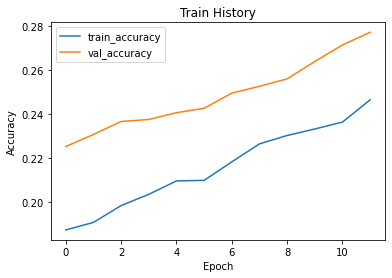

In [33]:
show_train_history('accuracy','val_accuracy')

In [34]:
#多分類問題用binary_crossentropy其實也不太對，但因為作業要求還是用用看
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [35]:
train_history2 = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                 validation_split=0.2, 
                 epochs=12, 
                 batch_size=128, 
                 verbose=1)

Epoch 1/12
313/313 [==============================] - 58s 186ms/step - loss: 0.2978 - accuracy: 0.2516 - val_loss: 0.3000 - val_accuracy: 0.2921
Epoch 2/12
313/313 [==============================] - 62s 198ms/step - loss: 0.2939 - accuracy: 0.2659 - val_loss: 0.2968 - val_accuracy: 0.3016
Epoch 3/12
313/313 [==============================] - 62s 197ms/step - loss: 0.2907 - accuracy: 0.2799 - val_loss: 0.2944 - val_accuracy: 0.3089
Epoch 4/12
313/313 [==============================] - 63s 200ms/step - loss: 0.2885 - accuracy: 0.2857 - val_loss: 0.2924 - val_accuracy: 0.3196
Epoch 5/12
313/313 [==============================] - 63s 202ms/step - loss: 0.2865 - accuracy: 0.2957 - val_loss: 0.2901 - val_accuracy: 0.3261
Epoch 6/12
313/313 [==============================] - 63s 201ms/step - loss: 0.2845 - accuracy: 0.3039 - val_loss: 0.2887 - val_accuracy: 0.3310
Epoch 7/12
313/313 [==============================] - 61s 196ms/step - loss: 0.2826 - accuracy: 0.3112 - val_loss: 0.2870 - val_ac

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history2(train_acc,test_acc):
    plt.plot(train_history2.history[train_acc])
    plt.plot(train_history2.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

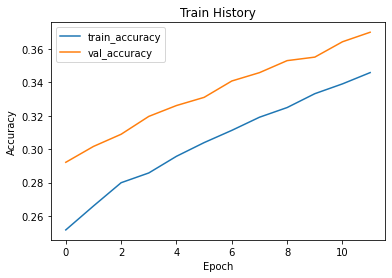

In [37]:
show_train_history2('accuracy','val_accuracy')